# 01. Importing Libraries

In [1]:
# TASK part 2 STEP 1: create new notebook and importing df

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Importing data 
Orders_products_all (from 4.9 task part 1)

In [2]:
path = r'/Users/bdigregorio/Desktop/CareerFoundry/' \
r'Data Immersion/Data Immersion 4/DI 4.2/Instacart Basket Analysis'

In [3]:
df_Orders_products_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Orders_products_all.pkl'))
                                        

In [4]:
#check import
df_Orders_products_all.head()

,user_id,first_name,last_name,gender,state,age,date_joined,number_of_dependents,family_status,income,...,busiest_day,busiest_days,Most orders,max_order,loyalty_flag,avg_spent,spender_type,median_order_days,customer_type,_merge
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Regularly busy,Fewest orders,9.0,New customer,7.988889,Low spender,20.0,Regular customer,both
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Regularly busy,Most orders,9.0,New customer,7.988889,Low spender,20.0,Regular customer,both
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Regularly busy,Most orders,9.0,New customer,7.988889,Low spender,20.0,Regular customer,both
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Regularly busy,Fewest orders,9.0,New customer,7.988889,High spender,20.0,Regular customer,both
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Regularly busy,Most orders,9.0,New customer,7.988889,High spender,20.0,Regular customer,both


In [5]:
df_Orders_products_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32642450 entries, 0 to 32642449
Data columns (total 36 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   user_id                 int64   
 1   first_name              object  
 2   last_name               object  
 3   gender                  object  
 4   state                   object  
 5   age                     int64   
 6   date_joined             object  
 7   number_of_dependents    int64   
 8   family_status           object  
 9   income                  int64   
 10  order_id                float64 
 11  order_number            float64 
 12  orders_day_of_the_week  float64 
 13  order_hour_of_day       float64 
 14  days_since_prior_order  float64 
 15  product_id              float64 
 16  add_to_cart_order       float64 
 17  reordered               float64 
 18  ords_priors_combined    category
 19  Unnamed: 0              float64 
 20  product_name            object  
 21  aisle_

In [6]:
# TASK part 2 STEP 2: create charts (done in exercise reading)

# 03. Histogram
'order_hour_of_day' column

Text(0.5, 1.0, 'Orders per Hour of Day')

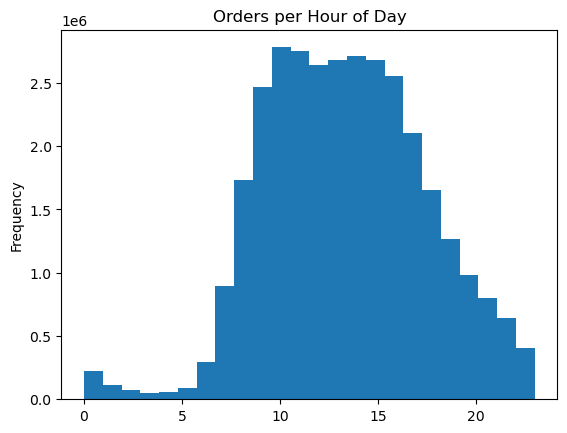

In [7]:
# TASK part 2 STEP 3: Create a histogram of the “order_hour_of_day” column
hist_order_hour_of_day = df_Orders_products_all['order_hour_of_day'].plot.hist(bins = 24)
plt.title("Orders per Hour of Day")

In this histogram on the column 'order_hour_of_day' we learn ordering habbits of the Instacart customers. I selectect 24 bins to represent the 24 hours of each day. We can see there are some late-night shoppers but between the hours of midnight-6am are the fewest orders made. Between 9am-4pm are the most orders made.

# 04. Bar chart
'loyatly_flag' column

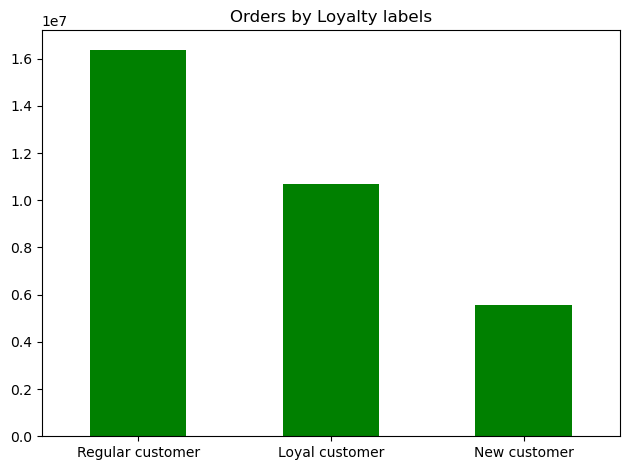

In [8]:
# TASK part 2 STEP 4: Create a bar chart from the “loyalty_flag” column
bar_loyalty_flag = df_Orders_products_all['loyalty_flag'].value_counts().plot.bar(color = 'green')
plt.xticks(rotation=0)
plt.title('Orders by Loyalty labels')
plt.tight_layout()

In [7]:
df_Orders_products_all['loyalty_flag'].value_counts(dropna = False)

Regular customer    16382119
Loyal customer      10679887
New customer         5580444
Name: loyalty_flag, dtype: int64

We can see very easily from this bar chart that most customers are "regular" customers followed by "Loyal" and then "New" customers.

# 05. Line charts
'prices' - 'order_hour_of_day'

In [19]:
# TASK part 2 STEP 5: Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day

In [8]:
# creating random sample of 'prices' 70/30
np.random.seed(4)
dev = np.random.rand(len(df_Orders_products_all)) <= 0.7

In [9]:
# checking dev
dev

array([False,  True, False, ...,  True, False, False])

In [22]:
# large sample 70%
large = df_Orders_products_all[dev]

In [10]:
# small sample 30#
small = df_Orders_products_all[~dev]

In [24]:
# checking samples
len(df_Orders_products_all)

32642450

In [25]:
len(large) + len(small)

32642450

sample created successfully

Text(0.5, 1.0, 'Total Order Value per Hour of the Day')

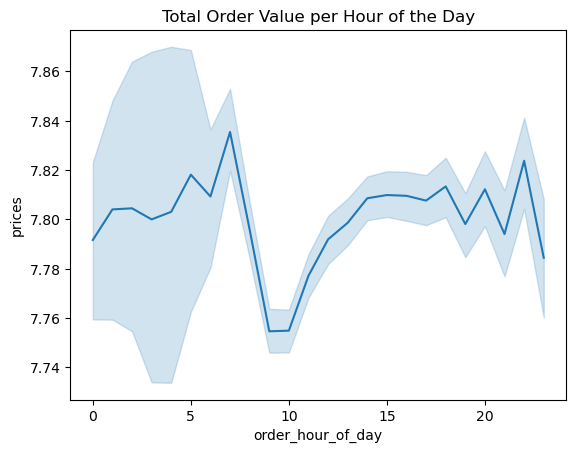

In [11]:
line_prices_hour = sns.lineplot(data = small, x = 'order_hour_of_day', y = 'prices') 
plt.title("Total Order Value per Hour of the Day")

This line chart shows us  prices are not affected by the hour of the day that orders are made.

In [10]:
# TASK part 2 STEP 6: exploratory analysis of customer demographics

Text(0.5, 1.0, 'Number of Dependents/Age')

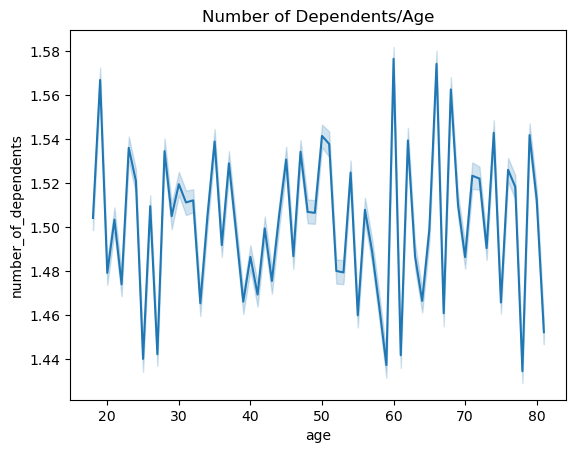

In [16]:
line_dependents = sns.lineplot(data = small, x = 'age', y = 'number_of_dependents')
plt.title("Number of Dependents/Age")

From this line chart exploring 'number_of_dependents' and 'age' does not really show us very much useful information. Age really is no criteria on which to base the number of dependents. 

# 06. Scatterplot
'age' and 'income'

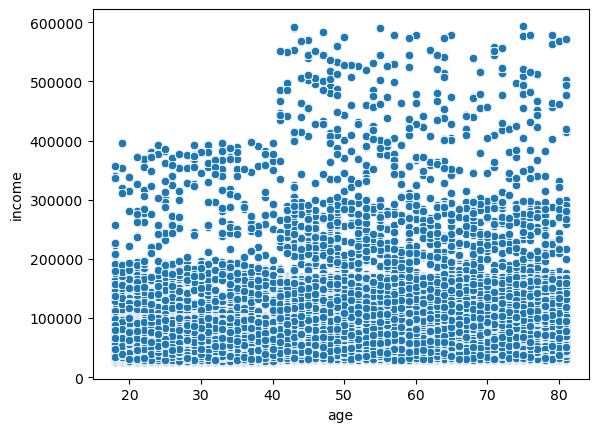

In [19]:
# TASK part 2 STEP 7:connection between age and spending power (income)
scatter_age_income = sns.scatterplot( x = 'age', y = 'income', data = df_Orders_products_all)


Text(0.5, 1.0, 'Income and Age')

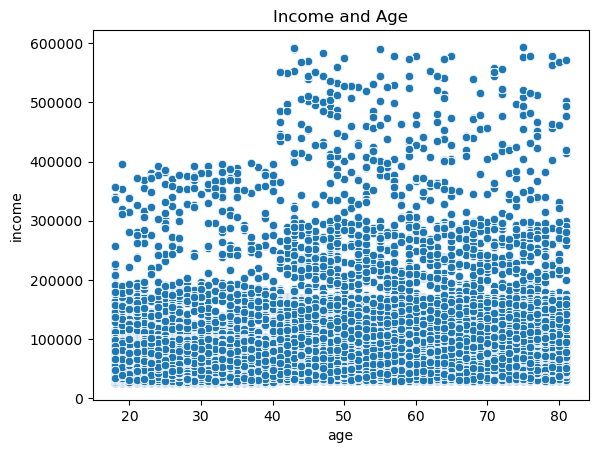

In [17]:
# checking 30% subset
scatter_age_income = sns.scatterplot( x = 'age', y = 'income', data = small)
plt.title('Income and Age')

Both age/income scatterplots are very, very similar. From them we learn that the age of Instacart customers does have a correlation with income. There is quite an increase in income for some customers just over 40 years. A quick visual inspection shows this income rise is for close 1/3 of customers. There is a base customer/income level of up to twenty-thousand dollars and that base seems to increase to about thirty-thousand dollars but just after age 40 a well.

# 07. Exporting visuals

In [21]:
# TASK part 2 STEP 8 Export your visualizations as “.png” files in your relevant project folder.:

In [8]:
# exporting hist_order_hour_of_day
hist_order_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_order_hour_of_day.png'))
                                 

In [9]:
# exporting bar_loyalty_flag
bar_loyalty_flag.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_flag.png')) 
                                             

In [18]:
# exporting line_dependents
line_dependents.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_dependents.png'))

In [25]:
# exporting scatter_age_income
scatter_age_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatter_age_income.png')) 


In [12]:
# exporting line_prices_hour
line_prices_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_order_value_hour.png'))